CSCI 0451

# Classifying Palmer Penguins

![cite: https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/](penguin3.jpg)

The Palmer Penguins dataset is a public dataset frequently used within the educational data science community. It contains Dr. Kristen Gorman and the Long Term Ecological Research Network's observations of hundreds of antartic penguins belonging to 3 species groups: Adelie, Gentoo, and Chinstrap.

This blog aims to accomplish three goals: 

1. Conduct exploration of the Palmer Penguins dataset

2. Methodically select 3 features and a model type that produces 100% penguin species classification accuracy on test data

3. Evaluate chosen model by analyzing decision regions and a confusion matrix

### Random Exploration

In [15]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train["Species"] = train["Species"].str.split().str.get(0)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


The training data contains 18 observations about 275 penguin subjects. Let's clean this data by dropping irrelevent columns and one-hot encoding the qualitative observations.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,51.1,16.5,225.0,5250.0,8.20660,-26.36863,True,False,False,True,False,True,False,True
271,35.9,16.6,190.0,3050.0,8.47781,-26.07821,False,False,True,True,True,False,True,False
272,39.5,17.8,188.0,3300.0,9.66523,-25.06020,False,True,False,True,False,True,True,False
273,36.7,19.3,193.0,3450.0,8.76651,-25.32426,False,False,True,True,False,True,True,False


Visualizations

/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flipper Length (mm)', ylabel='Count'>

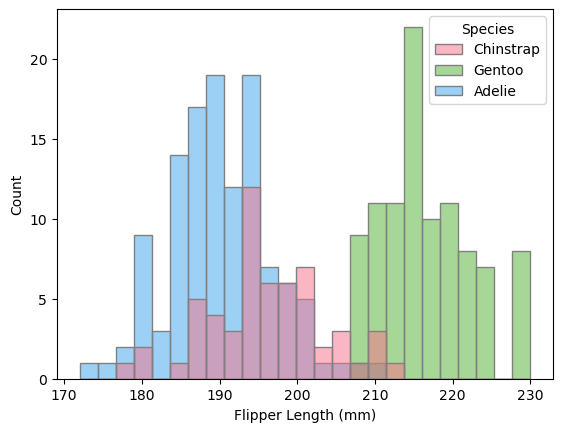

In [17]:
import seaborn as sns
sns.set_palette("husl", 3)

# visualization 1: flipper length frequency by species
sns.histplot(data = train, x = "Flipper Length (mm)", hue = "Species", bins = 25, edgecolor = 'grey')

This histogram shows the distribution of the penguins' flipper lengths. The bars are colored based on penguin species, so the shape of the distributions allow the viewer to infer the mean, medians, and modes for each species. There is a trend in flipper length based on species: Gentoo penguins tend to have the largest flippers, and Adelie and Chinstrap penguins have smaller ones. This indicates that flipper length may be a helpful feature to use in classification, as it effectively identifies the Gentoo penguins from the rest of the species.

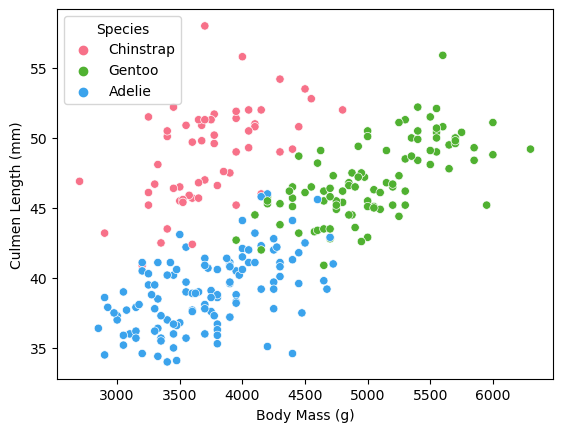

In [18]:
# visualization 2: body mass vs. culmen length
plot1 = sns.scatterplot(train, x = "Body Mass (g)", y = "Culmen Length (mm)", hue = "Species")

After considering multiple combinations of qualitative features in scatterplots, body mass and culmen length proved to show clear groupings of penguin species. Therefore, these two features are likely to be effective in a classification model. That being said, overlap does exist, especially between Adelie and Gentoo penguins.

In [19]:
# summary table
table = train.groupby(['Species', 'Island']).size()
table

Species    Island   
Adelie     Biscoe       33
           Dream        45
           Torgersen    42
Chinstrap  Dream        57
Gentoo     Biscoe       98
dtype: int64

This summary table shows the numbers of penguins present on each island. Every penguin on Torgersen island is an Adelie penguin, and both Gentoo and Chinstrap penguins can only be found on one island. These clear trends cause me to consider island location as a potential feature in a classification model. 

![cite: https://en.ac-illust.com/clip-art/22518802/illustration-of-a-cute-penguins-playing-a-computer](penguin_computer.jpg)

### Choosing Features

Because there were only 5 qualitative and 6 quantitative feature in the cleaned dataset, I chose to perform an exhaustive search to determine the most effective features and model for species classification. For each combination of 2 quantitative and 1 qualitative feature, I fit 4 models: Logistic Regression, Decision Tree, Random Forest, and SVM. Cross validation was performed to guard against overfitting as follows: 

1. Logistic Regression: recorded average accuracy of 5 rounds, each round with a random 20% of data used for testing
2. Decision Tree and Random Forest: performed grid search of varrying max_depth values, recorded highest accuracy achieved
3. SVM: performed grid search of varrying gamma values, recorded highest accuracy achieved

In [20]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import RandomForestClassifier

pd.set_option('max_colwidth', 10000)

all_qual_cols = ["Clutch Completion", "Sex", "Island", 'Stage_Adult, 1 Egg Stage']
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)' ]

columns = ['features', 'model', 'score']

score_df = pd.DataFrame(columns = columns)

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair)

    # Logistic Regression
    LR = LogisticRegression(max_iter = 20000000000)
    LR.fit(X_train[cols], y_train)  
    LRscore = cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()
    score_df.loc[len(score_df.index)] = [cols, 'Logistic', LRscore]  

    # Decision Tree
    DTC = DecisionTreeClassifier()
    param_grid = {'max_depth': [11,2,3,4,5,6,7,8,9,10, None]}
    grid_search = GridSearchCV(DTC, param_grid, cv = 5)
    grid_search.fit(X_train[cols], y_train)
    DTCscore = grid_search.best_score_
    score_df.loc[len(score_df.index)] = [cols, 'Decision Tree', DTCscore]  

    # Random Forest
    randomforest = RandomForestClassifier()
    grid_search = GridSearchCV(randomforest, param_grid, cv = 5)
    grid_search.fit(X_train[cols], y_train)
    RF_score = grid_search.best_score_
    score_df.loc[len(score_df.index)] = [cols, 'Random Forest', RF_score]

    # SVM
    param_grid = {'gamma': 10.0**np.arange(-5, 5)}
    SVC_model = SVC()
    grid_search = GridSearchCV(SVC_model, param_grid, cv = 5)
    grid_search.fit(X_train[cols], y_train)
    SVMscore = grid_search.best_score_
    score_df.loc[len(score_df.index)] = [cols, "SVM", SVMscore]

score_df.sort_values(by='score', ascending=False).head(10)


,features,model,score
60,"[Sex_FEMALE, Sex_MALE, Culmen Length (mm), Culmen Depth (mm)]",Logistic,0.988311
62,"[Sex_FEMALE, Sex_MALE, Culmen Length (mm), Culmen Depth (mm)]",Random Forest,0.988311
66,"[Sex_FEMALE, Sex_MALE, Culmen Length (mm), Flipper Length (mm)]",Random Forest,0.984465
126,"[Island_Biscoe, Island_Dream, Island_Torgersen, Culmen Length (mm), Flipper Length (mm)]",Random Forest,0.984389
122,"[Island_Biscoe, Island_Dream, Island_Torgersen, Culmen Length (mm), Culmen Depth (mm)]",Random Forest,0.984389
120,"[Island_Biscoe, Island_Dream, Island_Torgersen, Culmen Length (mm), Culmen Depth (mm)]",Logistic,0.984389
166,"[Island_Biscoe, Island_Dream, Island_Torgersen, Flipper Length (mm), Delta 13 C (o/oo)]",Random Forest,0.984314
138,"[Island_Biscoe, Island_Dream, Island_Torgersen, Culmen Length (mm), Delta 13 C (o/oo)]",Random Forest,0.980543
63,"[Sex_FEMALE, Sex_MALE, Culmen Length (mm), Culmen Depth (mm)]",SVM,0.980543
134,"[Island_Biscoe, Island_Dream, Island_Torgersen, Culmen Length (mm), Delta 15 N (o/oo)]",Random Forest,0.976621


For each model, the features, model type, and highest possible score was added to a dataframe. Sorting this dataframe by score revealed that Logistic Regression with Sex, Culmen Length and Culmen Depth as features produced the best classification.

![citation: https://www.dreamstime.com/stock-illustration-d-penguin-teaches-math-render-numbers-image45736629](penguin_with_numbers.jpg){width=50%}

### Evaluate Chosen Model

To truly evaluate our model, we must evaluate how it performs on unseen testing data.

In [21]:
# train with optimal features and model
LR = LogisticRegression()
optimal_features = ['Culmen Length (mm)', 'Culmen Depth (mm)','Sex_FEMALE', 'Sex_MALE']
LR.fit(X_train[optimal_features], y_train)  

/Users/lizrightmire/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
test["Species"] = test["Species"].str.split().str.get(0)

#test
X_test, y_test = prepare_data(test)
LR.score(X_test[optimal_features], y_test)

1.0

A score of 1.0 indicates that 100% of the penguins in the testing dataset were correctly classified by our model. Yippie!

Stepping back a little, let's consider: does this make sense? Should we be able to determine a penguin species based on its sex, culmen length, and culmen depth? 

Yes, it seems logical that different species of penguins have different culmen dimensions. I am also not surprised that sex is an important qualitative feature to consider, as penguin size, and consequently beak dimensions, vary based on sex. For example, female Gentoo penguins may have similar culmen lengths to a male Adelie, so sex is required to determine species.

To be sure, let's create a scatterplot of these 3 features and look at the decision regions produced by our logistic algorithm.

In [23]:
from matplotlib.patches import Patch
from matplotlib import pyplot as plt

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

For the training data: 

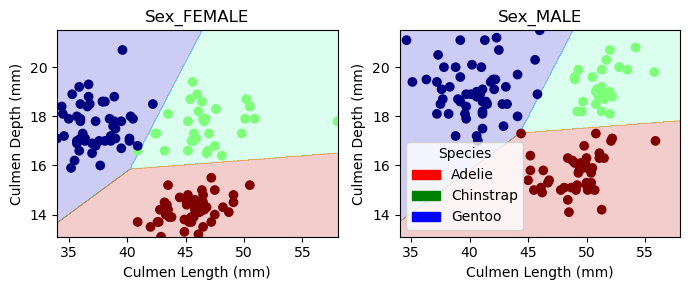

In [24]:
# training data
plot_regions(LR, X_train[optimal_features], y_train)

For the testing data: 

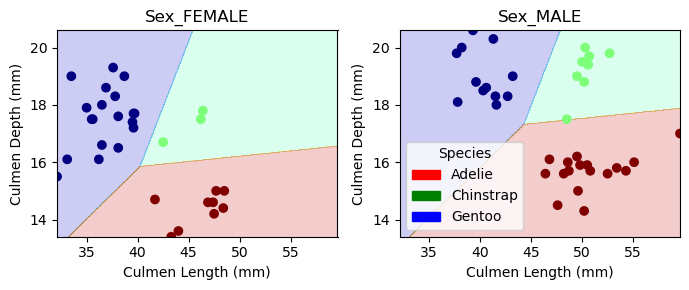

In [25]:
# testing data
plot_regions(LR, X_test[optimal_features], y_test)

Yes, separating penguins by sex creates very clear clusters of points by species in the testing data, which transfers perfectly to the points in the testing data. 

Another way to evaluate would be to look at a confusion matrix for this model

In [26]:
from sklearn.metrics import confusion_matrix

#actual
#predicted

y_test_pred = LR.predict(X_test[optimal_features]) # guesses for each data

cm = confusion_matrix(y_test, y_test_pred)

for i in range(3):
    for j in range(3):
        print(f"There were {cm[i,j]} {le.classes_[i]} penguin(s) who were classified as {le.classes_[j]}.")

There were 31 Adelie penguin(s) who were classified as Adelie.
There were 0 Adelie penguin(s) who were classified as Chinstrap.
There were 0 Adelie penguin(s) who were classified as Gentoo.
There were 0 Chinstrap penguin(s) who were classified as Adelie.
There were 11 Chinstrap penguin(s) who were classified as Chinstrap.
There were 0 Chinstrap penguin(s) who were classified as Gentoo.
There were 0 Gentoo penguin(s) who were classified as Adelie.
There were 0 Gentoo penguin(s) who were classified as Chinstrap.
There were 26 Gentoo penguin(s) who were classified as Gentoo.


Zero penguins were mis-classified. This makes sense because we got our logistic regression model had an accuracy of 1.0!

The plot below is another way to visualize the confusion matrix. For an accuracy of 1.0, we would expect zeros in every box execept for those on the diagonal, meaning that zero penguins were misclassified.

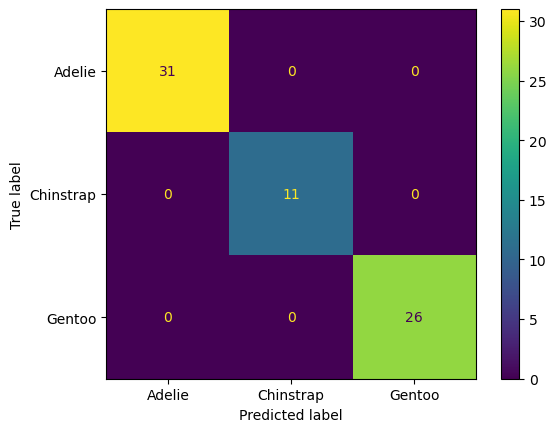

In [27]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_df = pd.DataFrame((cm), index = ['Gentoo','Chinstrap ','Adelie'], columns = ['Gentoo','Chinstrap','Adelie'])
display_labels = ["Adelie", "Chinstrap", "Gentoo"]
ConfusionMatrixDisplay(cm, display_labels = display_labels).plot(
    include_values=True)